# Project Description

Public facilities  like libraries usually have a computer for finding a book for general public. Users can go in the working hours to search the catalog and take a book with and without the help of staff. The dataset in question have all the list of public facilities which have computers. These computers have internet access from the government at all time. We have downloaded the dataset from the link (https://data.cityofnewyork.us/Social-Services/Citywide-Public-Computer-Centers/cuzb-dmcd) which was updated about a year ago in Sept. , 2017. Mayor's office of Chief technology officer (MOCTO) New York maintains this dataset and it has only 944 downloads to this date. Dataset is provided under the domain of 'open data access' from the city fo New York, USA. In the following section we will do the Exploratory data analysis (EDA) of the dataset in several critical steps. At each step we have have provided comments and code chunks describing the process for EDA analysis. 

# Objective

EDA analysis of the citywide public computer centres in New York. 

# Methodology

The steps of EDA planned are

- Overview of the data

- Checking shape, number of columns and missing values

- Identifying Unique values in the data

- Deleting columns with more than 90% missing values

- Replacing the data in features (columns) with mean, max ,median values. Choice of the replace method depends upon of data.

- Data visualisation of the each categorical and numerical feature using barplot, histograms, scatter plot, maps and line graphs

- Statistical analysis of important features with the help of ANOVA, t-test and measure of central tendency after removing the outliers.

- Performing critical analysis of the interlink between features which can help the Mayor office for future decision.

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point,Polygon
import descartes
import plotly.express as px
import folium
from folium import plugins
import missingno as msno

### Importing dataset

In [ ]:
df = pd.read_table("/work/Citywide_Public_Computer_Centers.csv",sep=',')

### converting json file to pandas dataframe

In [ ]:
df = pd.DataFrame(df)

### setting pandas options to display all rows in the ipynb code output

In [ ]:
pd.set_option('display.max_rows', None)

### Getting overview of data using `head` function

In [ ]:
df.head()

,OID,Oversight Agency,Operator Name,Location Name,Address,AddrNum,AddrDir,AddrStr,Addr_Suffix,City,...,Borough,NTA Code,NTA Name,Council Distrcit,BoroCD,Census Tract,BCTCB2010,BIN,BBL,Location
0,353,Department for the Aging,YOUNG ISRAEL PROGRAMS INC,QUEENS VALLEY NEIGHBORHOOD SENIOR CENTER,141-55 77th Avenue,141-55,NaN,77th,Avenue,Queens,...,Queens,QN37,Kew Gardens Hills,24,408,77903,40779031000,4143547,4066280084,POINT (-73.819422 40.721434)
1,294,Department for the Aging,JEWISH ASSOCIATION FOR SERVICES FOR THE AGED,COOP CITY NEIGHBORHOOD SENIOR CENTER,2049 Bartow Avenue,2049,NaN,Bartow,Avenue,Bronx,...,Bronx,BX13,Co-op City,12,210,46201,20462011022,2097466,2051410100,POINT (-73.829062 40.870509)
2,177,Queens Library,Queens Library,Flushing JBA,41-17 Main Street,41-17,NaN,Main,Street,Flushing,...,Queens,QN22,Flushing,20,407,85300,40853002000,4114282,4050430011,POINT (-73.82888469 40.75777407)
3,379,Department for the Aging,SAMUEL FIELD YM & YWHA INC,SAMUEL FIELD NEIGHBORHOOD SENIOR CENTER,58-20 Little Neck Parkway,58-20,NaN,Little Neck,Parkway,Queens,...,Queens,QN45,Douglas Manor-Douglaston-Little Neck,23,411,152902,41529023014,4173029,4083520051,POINT (-73.723273 40.760948)
4,392,Department for the Aging,SENIOR CITIZENS LEAGUE OF FLATBUSH INC,SR CITIZENS LEAGUE OF FLATBUSH NBH SR CT,870 Ocean Parkway,870,NaN,Ocean,Parkway,Brooklyn,...,Brooklyn,BK42,Flatbush,44,312,46201,30462012000,3170453,3065080006,POINT (-73.971057 40.627218000000006)


### The shape of the dataset which shows the number of rows and column is given as 

In [ ]:
print('\nDataFrame Shape :', df.shape)
print('\nNumber of rows :', df.shape[0])
print('\nNumber of columns :', df.shape[1])


DataFrame Shape : (508, 70)

Number of rows : 508

Number of columns : 70


### Checking names of columns and their description

In [ ]:
df.columns

Index(['OID', 'Oversight Agency', 'Operator Name', 'Location Name', 'Address',
       'AddrNum', 'AddrDir', 'AddrStr', 'Addr_Suffix', 'City', 'State',
       'Postcode', 'Latitude', 'Longitude', 'Wireline Dwn', 'Wireline Up',
       'WiFi Dwn', 'WiFi Up', 'Wi-Fi Available', 'Workstation #', 'Staffed',
       'Mon Open', 'Mon Close', 'Mon Open_2', 'Mon Close_2', 'Tue Open',
       'Tue Close', 'Tue Open_2', 'Tue Close_2', 'Wed Open', 'Wed Close',
       'Wed Open_2', 'Wed Close_2', 'Thu Open', 'Thu Close', 'Thu Open_2',
       'Thu Close_2', 'Fri Open', 'Fri Close', 'Fri Open_2', 'Fri Close_2',
       'Sat Open', 'Sat Close', 'Sat Open_2', 'Sat Close_2', 'Sun Open',
       'Sun Close', 'Language Access', 'Wheelchair Accessible',
       'Wheelchair Access Notes', 'OS Accessibility Features',
       'Open Lab Hrs Per Wk', 'Training  Hours Per Wk',
       'Supplementary Equipment', 'Device Loaning', 'Devices Loaned',
       'Access Requirements', 'Access Notes', 'URL', 'BoroCode', 'Borough

- OID = Unique identification number assigned to each center in the dataset

- Oversight agency = Name of City agency responsible overseeing the center. New York Public Library, Brooklyn Public Library, Queens Library, Department of Parks and Recreation, Department for the Aging, Department of Youth and Community Development, New York City Housing Authority; data is as reported by the Oversight Agency


- Operator_name= Name of City agency or contracted organization responsible for operating the center. In many cases, the "operator" is the same as the "oversight agency."  However, the centers overseen by the Department for the Aging, Department of Youth and Community Development and the New York City Housing Authority have agreements with third-party organizations to operate centers under their oversight.  These organizations are often called "sponsors" of the sites.  In these cases, "oversight agency" and "operator" names will be different; data is as reported by the Oversight Agency


- location_name = Name of the library, community center, senior center, or recreation center in which a computer lab or space is located

- address = Full street address where the center is located

- AddrNum = Building number component of street address where the center is located

- AddrDir = Direction component of street address where the center is located. "E." means "East," "W." means "West," "N." means "North," "S." means "South"

- AddrStr = Street name component of street address where the center is located

- Addr_Suffix = Street suffix component of street address where the center is located

- City = City in which the center is located. In some cases, "City" data for centers located in Queens was reported with a specific neighborhood name


- State = State in which the center is located. "NY" means "New York"

- Postcode = Zip code in which the center is located	

- Latitude = Latitude coordinate of center location	

- Longitude = Longitude coordinate of center location	

- Wireline_Dwn	= Download speed in megabits per second (Mbps) of wireline internet service available at the center		Mbps (megabits per second); "N/A" means there is no service at the location

- Wireline_Up= Upload speed in megabits per second (Mbps) of wireline internet service available at the center. Mbps (megabits per second); "N/A" means there is no service at the location

- Wifi_Dwn = WiFDownload speed in megabits per second (Mbps) of WiFi internet service available at the center. Mbps (megabits per second); "N/A" means there is no service at the location

- wifi_up = Upload speed in megabits per second (Mbps) of WiFi internet service available at the center. Mbps (megabits per second); "N/A" means there is no service at the location\

- wi_fi_available= Indication of whether the center offers public Wi-Fi. "Y" means "yes" and "N" means "no."	

- Workstation=	Number of computer workstations, defined as desktop or laptop computers, available for public use at the center	

- Staffed = Indication by the oversight agency of whether the center currently has staff to both a) maintain the center's technology resources in good working order, and b) support patrons' use of the center's technology resources in the form of answering questions, etc.	"Y" means "yes" and "N" means "no."	

- mon_open = Time on Mondays at which the computer center/area opens for public use, or indication that the center is closed on Mondays.		

- mon_close = Time on Mondays at which the computer center/area closes for public use, or indication that the center is closed on Mondays.

- mon_open_2 = Additional Time on Mondays at which the computer center/area opens for public use, or indication that the center is closed on Mondays.		

- Mon_Close_2	= Additional Time on Mondays at which the computer center/area closes for public use, or indication that the center is closed on Mondays.	

- Tue_Open= Time on Tuesdays at which the computer center/area opens for public use, or indication that the center is closed on Tuesdays.		

- Tue_Close= Time on Tuesdays at which the computer center/area closes for public use, or indication that the center is closed on Tuesdays.		

- Tue_Open_2	= Additional Time on Tuesdays at which the computer center/area opens for public use, or indication that the center is closed on Tuesdays.	

- Tue_Close_2	Additional Time on Tuesdays at which the computer center/area closes for public use, or indication that the center is closed on Tuesdays.		

- Wed_Open	Time on Wednesdays at which the computer center/area opens for public use, or indication that the center is closed on Wednesdays.		

- Wed_Close	Time on Wednesdays at which the computer center/area closes for public use, or indication that the center is closed on Wednesdays.	

- Wed_Open_2	Additional Time on Wednesdays at which the computer center/area opens for public use, or indication that the center is closed on Wednesdays.		

- Wed Close_2 Additional Time on Wednesdays at which the computer center/area closes for public use, or indication that the center is closed on Wednesdays.		

- Thu Open	Time on Thursdays at which the computer center/area opens for public use, or indication that the center is closed on Thursdays.		

- Thu Close	Time on Thursdays at which the computer center/area closes for public use, or indication that the center is closed on Thursdays.		

- Thu Open_2	Additional Time on Thursdays at which the computer center/area opens for public use, or indication that the center is closed on Thursdays.		

- Thu_Close_2	Additional Time on Thursdays at which the computer center/area closes for public use, or indication that the center is closed on Thursdays.		

- Fri_Open	Time on Fridays at which the computer center/area opens for public use, or indication that the center is closed on Fridays.		

- Fri_Close	Time on Fridays at which the computer center/area closes for public use, or indication that the center is closed on Fridays.		

- Fri_Open_2	Additional Time on Fridays at which the computer center/area opens for public use, or indication that the center is closed on Fridays.		

- Fri Close_2	Additional Time on Fridays at which the computer center/area closes for public use, or indication that the center is closed on Fridays.		

- Sat_Open	Time on Saturdays at which the computer center/area opens for public use, or indication that the center is closed on Saturdays.		

- Sat_Close	Time on Saturdays at which the computer center/area closes for public use, or indication that the center is closed on Saturdays.		

- Sat_Open_2	Additional Time on Saturdays at which the computer center/area opens for public use, or indication that the center is closed on Saturdays.		

- Sat_Close_2	Additional Time on Saturdays at which the computer center/area closes for public use, or indication that the center is closed on Saturdays.		

- Sun_Open	Time on Sundays at which the computer center/area opens for public use, or indication that the center is closed on Sundays.		

- Sun_Close	Time on Sundays at which the computer center/area closes for public use, or indication that the center is closed on Sundays.		

- Language_Access	Description of any resources or services provided at the center in languages other than English.		"N/A" means there are no language access resources offered at the center; data is as reported by the Oversight Agency

- Wheelchair_Accessible	Indication of whether the facility is wheelchair accessible or not.	"Y" means "yes" and "N" means "no."	Data may be "Y," "N," or "Partially".  An explanation, or follow up action where "Partially" is used is included in the following column, "Wheelchair Access Notes"; data is as reported by the Oversight Agency

- Wheelchair_Access_Notes	Further explanation of "Partially" responses to the "Facility Wheelchair Accessible? (Y/N)" column.		"N/A" means there is no further explanation for the data in the "Wheelchair Access Notes" column; data is as reported by the Oversight Agency

- OS_Accessibility_Features 	Indication of whether publicly available workstations at the facility have disability access features available through their operating system.	"OS" means "operating system."  "Y" means "yes" and "N" means "no."	

- Open_Lab_Hrs_Per_Wk	Number of hours per week that the center's computers with internet access are available to the public for open, unprogrammed use. Hours; 

- Training_Hrs_Per_Wk	Average number of hours per week that the center provides digital literacy training programs.		Hours; "0" means there are no digital literacy training programs available at the center; 

- Supplementary_Equipment = Description of equipment other than computers that is available for public use at the center.		"N/A" means there is no supplementary equipment available at the center; 

- Device Loaning	Indication of whether the center loans devices to the public to take home."N/A" means there is no take-home device loaning available at the center; 

- Devices Loaned	Type of device the center offers to the public to borrow at home."N/A" means there is no take-home device loaning available at the center; 

- Access Requirements	Description of any requirements the center imposes for public use, whether related to age, registration procedures, or other.		

- Access Notes	Indication of whether there are any temporary restrictions on access to the center, such as temporary closure for renovations."N/A" means there are no temporary restrictions on access to the center, such as temporary closure for renovations; 

- URL	Website at which more information about the center and/or operating entity can be found.

- BoroCode	Code for the New York City borough where the center is located.	"1"  means "Manhattan," "2" means "Bronx," 3" means "Brooklyn," "4" means "Queens," and "5" means "Staten Island"	

- Borough	Name of borough in which center is located		

- NTA Code	Four (4) digit code assigned to neighborhoods to differentiate NYC's five boroughs. Each NTA within NYC's 5 boroughs is given a unique value. 

- NTA Name	Neighborhood identifiers to differentiate NYC's five boroughs.Neighborhood Tabulation Areas, or NTAs, are aggregations of census tracts that are subsets of New York City's 55 Public Use Microdata Areas (PUMAs).

- Council District	Council District in which center is located.		

- BoroCD	New York City Borough plus Community Board Numbers.		

- Census Tract	Census Tract in which center is located.		

- BCTCB2010	Combined value of Borough CD and Census 2010.		

- BIN	Building Identity Number of building in which center is located.		

- BBL	Borough, Block, Lot Number in which center is located.		

- Location	Combination of the Lat and Long values shown in earlier so-labeled columns.	

### We can check the data types in each column by using `dtypes` command

In [ ]:
df.dtypes.value_counts()

object     49
int64      10
float64     8
bool        3
dtype: int64

It shows that we have 49 object type columns, 10 int64, 8 float types and 3 bool variables. 

### Checking number of missing values in each column and getting sum 

There are many columns with missing values. Most of them are in the last columns of the dataframe. We can display the percentage of missing values in each column as 

In [ ]:
df.isnull().sum()/len(df)*100

OID                           0.000000
Oversight Agency              0.000000
Operator Name                 0.000000
Location Name                 0.000000
Address                       0.000000
AddrNum                       0.196850
AddrDir                      82.677165
AddrStr                       0.000000
Addr_Suffix                   5.314961
City                          0.000000
State                         0.000000
Postcode                      0.000000
Latitude                      0.000000
Longitude                     0.000000
Wireline Dwn                  0.196850
Wireline Up                   0.196850
WiFi Dwn                     12.204724
WiFi Up                      12.204724
Wi-Fi Available               0.000000
Workstation #                 0.000000
Staffed                       0.000000
Mon Open                      0.000000
Mon Close                     0.000000
Mon Open_2                   99.015748
Mon Close_2                  99.015748
Tue Open                 

We can confirm our previous observation that there are columns with more than 99% missing values. 

### Deleting columns with  more than 90% missing value

In the above result we realize that lots of missing values. We can check the columns which have more than 90% missing values and print names of those features

In [ ]:
nan_per=df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100
useless_features=nan_per[nan_per>90].index
print('Useless features:', useless_features)

Useless features: Index(['Sat Close_2', 'Sat Open_2', 'Fri Close_2', 'Fri Open_2', 'Wed Close_2',
       'Wed Open_2', 'Mon Close_2', 'Mon Open_2', 'Thu Close_2', 'Tue Close_2',
       'Tue Open_2', 'Thu Open_2', 'Access Notes', 'Wheelchair Access Notes'],
      dtype='object')


Now we will drop all those columns which have more than 90% missing values

In [ ]:
df.drop(useless_features, axis=1, inplace=True)
print('Shape of the food dataset is:', df.shape)

Shape of the food dataset is: (508, 56)


We can also drop some columns which are not important such as `oid` and url` etc

In [ ]:
df=df.drop(['OID', 'URL','State','BoroCode','AddrDir','BCTCB2010'], axis=1)

After Dropping the final shape is 50 columns and 508 rows. We can check the unique values in each column below;

In [ ]:
unique_values = df.nunique()
print('Count of unique value sin each column :')
print(unique_values)

Count of unique value sin each column :
Oversight Agency               7
Operator Name                135
Location Name                496
Address                      493
AddrNum                      435
AddrStr                      358
Addr_Suffix                   18
City                          47
Postcode                     163
Latitude                     495
Longitude                    495
Wireline Dwn                 107
Wireline Up                   67
WiFi Dwn                      94
WiFi Up                       60
Wi-Fi Available                2
Workstation #                 82
Staffed                        2
Mon Open                      21
Mon Close                     22
Tue Open                      24
Tue Close                     22
Wed Open                      24
Wed Close                     22
Thu Open                      24
Thu Close                     22
Fri Open                      26
Fri Close                     25
Sat Open                      16
Sat

The columns with 1 or 2 unique values are boolean variables while others have many unique values. For instance in the devices loaned column we have 2 unique values only which are chromebooks loaned and remaining are missing values. 

There are many columns with time series data which can only be converted to some useful value after using pandas `_to_datetime` command.

identifying those columns which have string data in between time series data

In [ ]:

df.columns[(df.values=='Closed').any(0)].tolist()

['Mon Open',
 'Mon Close',
 'Tue Open',
 'Tue Close',
 'Wed Open',
 'Wed Close',
 'Thu Open',
 'Thu Close',
 'Fri Open',
 'Fri Close',
 'Sat Open',
 'Sat Close',
 'Sun Open',
 'Sun Close']

In [ ]:
df.columns[(df.values=='By Appointment').any(0)].tolist()

['Fri Open', 'Fri Close']

### Filling the null values using bfill() and ffill() methods of pandas

In [ ]:
df = df.bfill(axis='rows')
df = df.ffill(axis='rows')

Above columns have strings `Closed` and `By Appointment` in them. which needs to be replaced by something in order to convert the column to time series using pandas `to_datetime` function

### Replacing strings to integers in time series columns

In [ ]:
df = df.replace('Closed',1)
df = df.replace("By Appointment",2)

In [ ]:
df.columns[(df.values=='Closed').any(0)].tolist()
df.columns[(df.values=='By Appointment').any(0)].tolist()

[]

Now we have no columns with string `closed` or `by appointment`.

We can filter those columns which have time series data. Luckily in our dataset all those columns have identical column names with prefix `open` or `close`.

In [ ]:
open_time_columns = df.filter(regex='Open',axis=1)
close_time_columns = df.filter(regex='Close',axis=1)

We can check if these columns have any missing value before converting them to time series. 

In [ ]:
close_time_columns.isnull().sum()
open_time_columns.isnull().sum()

Mon Open               0
Tue Open               0
Wed Open               0
Thu Open               0
Fri Open               0
Sat Open               0
Sun Open               0
Open Lab Hrs Per Wk    0
dtype: int64

At this stage we will convert all those column with time series string to time series format. In this way they will have `datetime[ns]` format and easy to handle in EDA analysis.

### Converting the datatype object to datetime

In [ ]:
open_time_columns['Fri Open'] = pd.to_datetime(open_time_columns['Fri Open'], errors='coerce')
open_time_columns['Mon Open'] = pd.to_datetime(open_time_columns['Mon Open'], errors='coerce')
open_time_columns['Tue Open'] = pd.to_datetime(open_time_columns['Tue Open'], errors='coerce')
open_time_columns['Wed Open'] = pd.to_datetime(open_time_columns['Wed Open'], errors='coerce')
open_time_columns['Thu Open'] = pd.to_datetime(open_time_columns['Thu Open'], errors='coerce')
open_time_columns['Sat Open'] = pd.to_datetime(open_time_columns['Sat Open'], errors='coerce')
open_time_columns['Sun Open'] = pd.to_datetime(open_time_columns['Sun Open'], errors='coerce')

close_time_columns['Fri Close'] = pd.to_datetime(close_time_columns['Fri Close'], errors='coerce')
close_time_columns['Mon Close'] = pd.to_datetime(close_time_columns['Mon Close'], errors='coerce')
close_time_columns['Tue Close'] = pd.to_datetime(close_time_columns['Tue Close'], errors='coerce')
close_time_columns['Wed Close'] = pd.to_datetime(close_time_columns['Wed Close'], errors='coerce')
close_time_columns['Thu Close'] = pd.to_datetime(close_time_columns['Thu Close'], errors='coerce')
close_time_columns['Sat Close'] = pd.to_datetime(close_time_columns['Sat Close'], errors='coerce')
close_time_columns['Sun Close'] = pd.to_datetime(close_time_columns['Sun Close'], errors='coerce')


subtracting the open and closing time columns to get the time for each day for computer centres.

In [ ]:
mon_hours = close_time_columns['Mon Close'] - open_time_columns['Mon Open'] 
tue_hours = close_time_columns['Tue Close'] - open_time_columns['Tue Open'] 
wed_hours = close_time_columns['Wed Close'] - open_time_columns['Wed Open'] 
thu_hours = close_time_columns['Thu Close'] - open_time_columns['Thu Open'] 
fri_hours = close_time_columns['Fri Close'] - open_time_columns['Fri Open']  
sat_hours = close_time_columns['Sat Close'] - open_time_columns['Sat Open']  
sun_hours = close_time_columns['Sun Close'] - open_time_columns['Sun Open']  

Since we have converted the `open` and `close` columns we can drop these columns in main dataframe

In [ ]:
x = open_time_columns.columns
y = close_time_columns.columns

In [ ]:
df=df.drop(x,axis=1)
df = df.drop(y,axis=1)

Our study area is located south east of USA as shown by purple dots on the map below. 

In [ ]:
fig = px.scatter_geo(df,lat='Latitude',lon='Longitude', hover_name="Council Distrcit",scope='usa')
fig.update_layout(title = 'Public Computers centres in New York State', title_x=0.5)
fig.show()

Which can be shown as 

In [ ]:
import folium
# Build the default map for a specific location
map = folium.Map(location=[df['Latitude'].mean(),df['Longitude'].mean()],tiles="openstreetmap", zoom_start=10)
map

### Comparing internet access at different centres

We plot the location of computer centres on map of New York state with the help of latitude and longitude coordinates with the colour coordinates of wifi download speeds. Only 2-3 centres have download speed of 5000 Megabytes/second which is actually 40Gb/s. 

<AxesSubplot:title={'center':'Wifi download speed in all centres'}, xlabel='Longitude', ylabel='Latitude'>

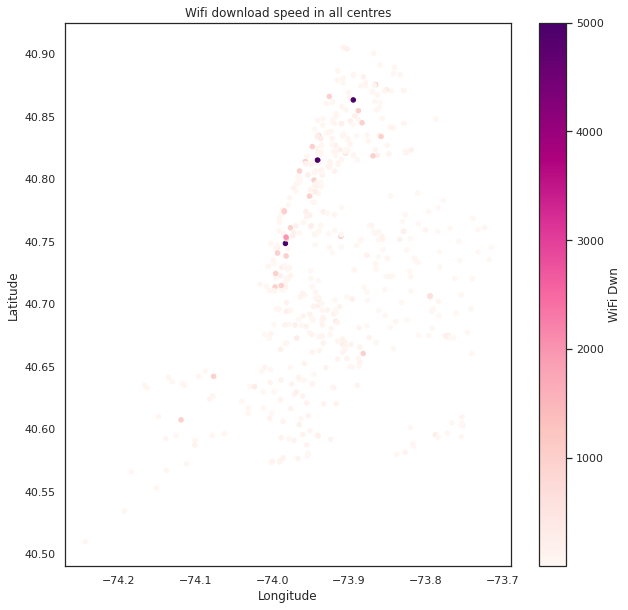

In [ ]:

fig, ax = plt.subplots(figsize=(10,10))
df.plot(x="Longitude", y="Latitude", kind="scatter", c="WiFi Dwn",
       colormap="RdPu",ax=ax,title='Wifi download speed in all centres')

We can also plot the wireline speed in the same areas. It helps us to identify if the both wifi and wireline speeds are identical in those or it varies at other locations.

<AxesSubplot:title={'center':'Internet cable download speed in all centres'}, xlabel='Longitude', ylabel='Latitude'>

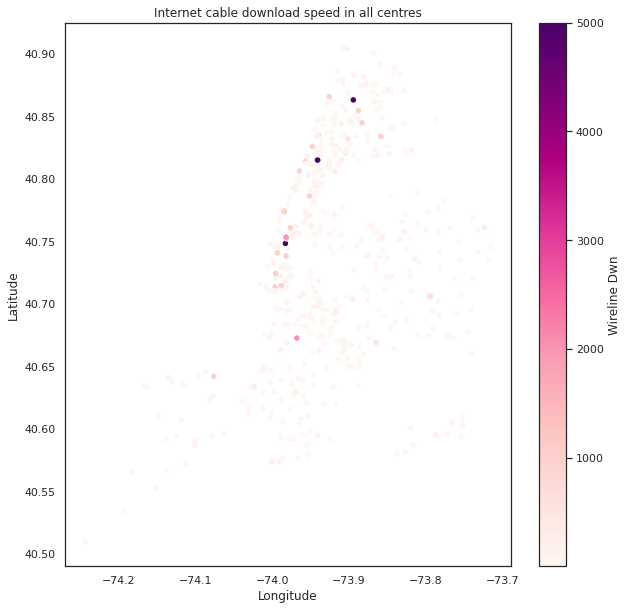

In [ ]:

fig, ax = plt.subplots(figsize=(10,10))
df.plot(x="Longitude", y="Latitude", kind="scatter", c="Wireline Dwn",
        colormap="RdPu",ax=ax,title='Internet cable download speed in all centres')

Having a closer look at the two maps above the centres with highest download speeds are identical which means that only 2-3 centres have in New York state have speed of 40 Gb/s as compared to other 505 locations. 

In [ ]:
px.pie(df, values= 'Workstation #', names='Wi-Fi Available',
       title='Percentage of Computer centres with Wifi avalaible').update_layout(title_text='Percentage of Computer centres with Wifi avalaible', title_x=0.5)

There are less than 6% computer centres which does not have wifi available. Let's count those centres with the help of count plot.

Text(0.5, 1.0, 'Number of computer centres with wireline internet only')

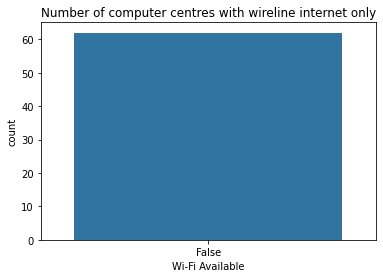

In [ ]:
wifi = df[df['Wi-Fi Available']==False]
sns.countplot(x="Wi-Fi Available", data=wifi)
plt.title("Number of computer centres with wireline internet only")

We can plot those centres on map as well to find exactly where they are located alongwith their county.

In [ ]:
from folium import plugins

m = folium.Map(location=[df['Latitude'].mean(),df['Longitude'].mean()],tiles="openstreetmap", zoom_start=10)

wifi_lat = wifi.loc[:,['Latitude','Longitude']]

stationArr = wifi_lat.values


m.add_child(plugins.HeatMap(stationArr, radius=15))
m

### Comparison of Centres located at Avenue and Streets

Highest number of centres are located at Avenues followed by a street address in New York State according to figure below. 

Text(0.5, 0, 'Street type of centres')

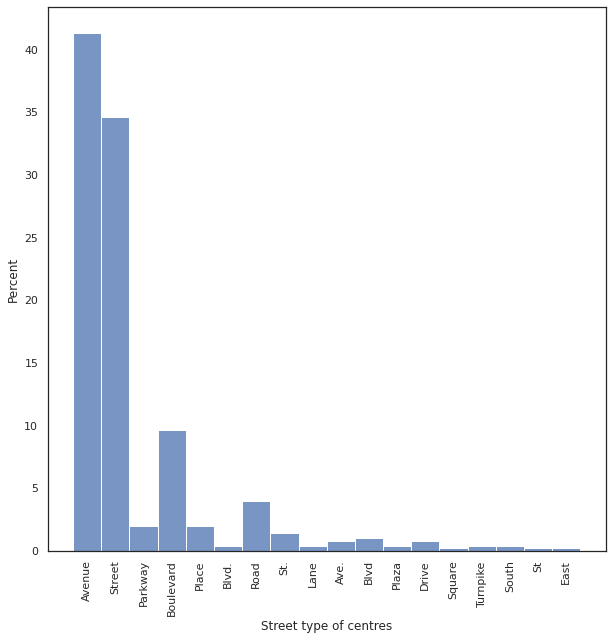

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(df,x='Addr_Suffix', discrete=True,stat="percent")
plt.xticks(rotation=90)
plt.xlabel("Street type of centres")

### 

### Comparison of Boolean variables

We have 3 boolean variables of wifi availability , staffed/non staffed centres and OS accessibility. We have plotted them side by side to analyse relation ship between them. 

<AxesSubplot:title={'center':'Centres which have staff, wifi and OS computers'}>

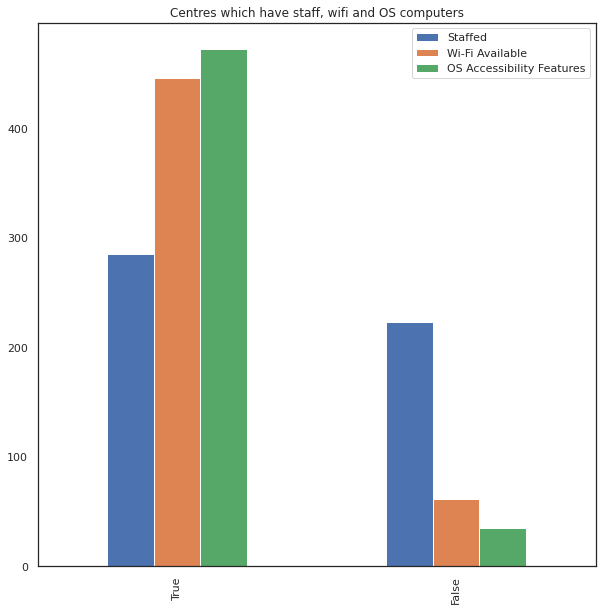

In [ ]:
x = df.loc[:,['Staffed','Wi-Fi Available','OS Accessibility Features']]

x.apply(pd.value_counts).plot(kind='bar', 
                                     title='Centres which have staff, wifi and OS computers',figsize=(10,10))

Above graph shows that Wifi availability is usually not dependent on staff presence. In the centres with high staff wifi may not work. In the centres with OS availability Wifi is usually available. 

### Special Persons Accessibility in Centres

We can verify that with the data for feature `wheelchair accessibility`. 

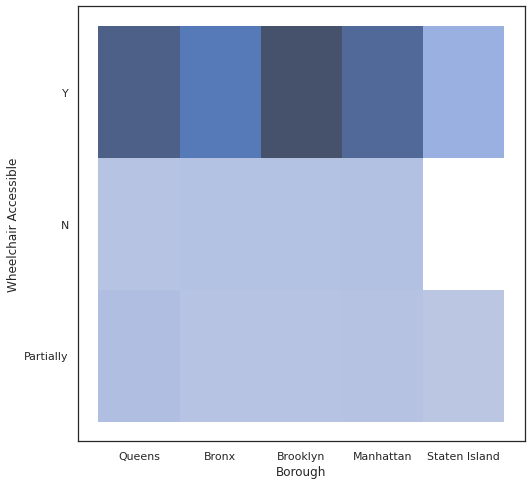

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(y="Wheelchair Accessible",x="Borough",data=df)
plt.show()

In all the Borough/counties all type of Wheel chair accessible centres are present. Brooklyn Borough has highest # of such centres. 

## Some other visualizations

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



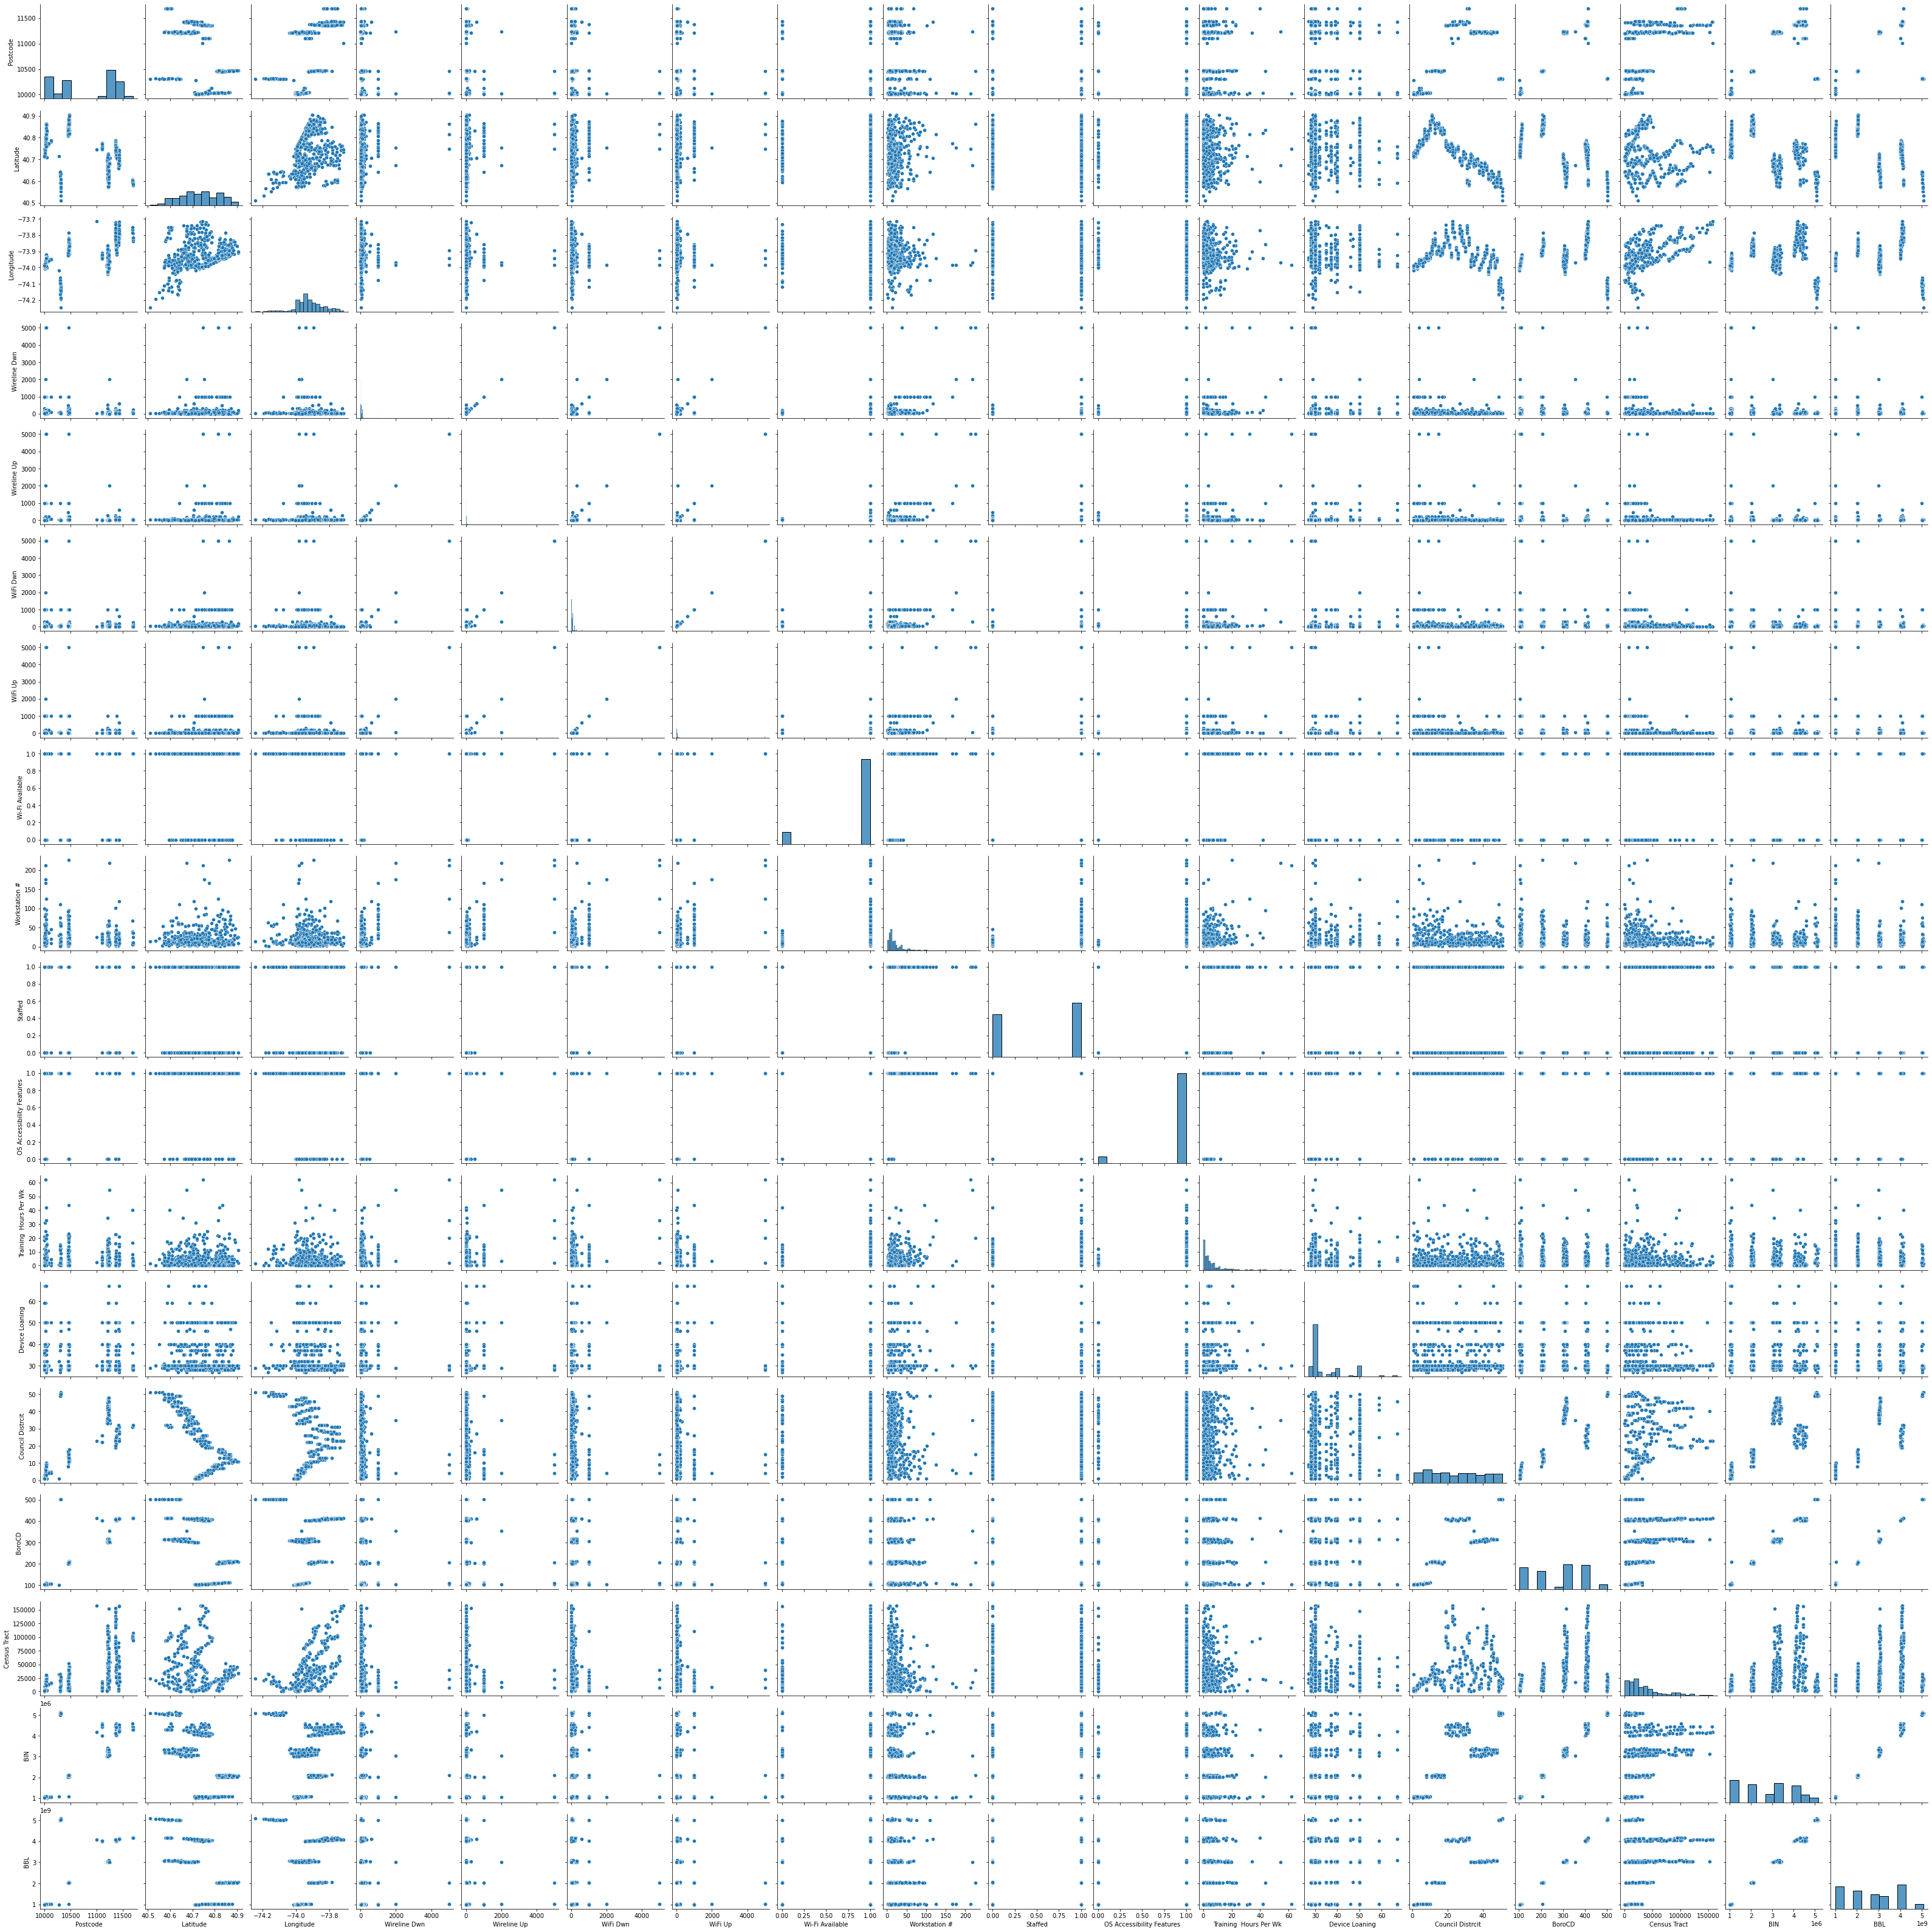

In [ ]:
sns.pairplot(df)

In [ ]:
plt.figure(figsize=(10,10))
px.bar(df,y='Device Loaning', color='Borough', x='Oversight Agency',barmode='group')

<Figure size 720x720 with 0 Axes>

Centres which give the computer devices on loan are largely situated on Brooklyn followed Jamaica. In the agency list, Queens library have the highest ratio of giving tables, PC on loan. 

### Getting summary Statistics of the dataset

In [ ]:
df.describe()

,Postcode,Latitude,Longitude,Wireline Dwn,Wireline Up,WiFi Dwn,WiFi Up,Workstation #,Training Hours Per Wk,Device Loaning,Council Distrcit,BoroCD,Census Tract,BIN,BBL
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,5.080000e+02,5.080000e+02
mean,10802.112205,40.732189,-73.919567,145.559055,121.625984,157.854331,131.363583,22.639764,5.071850,34.147638,24.141732,278.082677,38212.210630,2.848491e+06,2.742282e+09
std,559.120729,0.084847,0.082835,491.175214,493.682282,491.456450,495.275517,26.541660,6.949432,8.174373,14.701084,121.063145,34611.810014,1.285278e+06,1.228639e+09
min,10001.000000,40.509531,-74.244107,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,27.000000,1.000000,101.000000,201.000000,1.001289e+06,1.000168e+09
25%,10305.000000,40.672507,-73.967043,20.000000,6.000000,20.000000,6.000000,9.000000,1.000000,29.000000,11.000000,201.000000,14400.000000,2.004601e+06,2.024205e+09
50%,11201.000000,40.731699,-73.926943,35.500000,20.000000,44.000000,20.000000,13.000000,3.000000,30.000000,23.500000,305.000000,26250.000000,3.076724e+06,3.020265e+09
75%,11235.000000,40.806108,-73.866949,94.000000,37.000000,101.000000,40.000000,26.000000,6.500000,37.000000,36.000000,403.000000,49150.500000,4.100198e+06,4.017183e+09
max,11694.000000,40.905009,-73.714838,5000.000000,5000.000000,5000.000000,5000.000000,226.000000,62.100000,67.000000,51.000000,503.000000,157902.000000,5.157567e+06,5.078990e+09


### Training Hours offered in Boroughs

We can identify if the training hours offered are dependent upon population of borough. below plot nullify our assumptions. Trainings are offered in all counties and normal average is below 10. 

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Population of city')

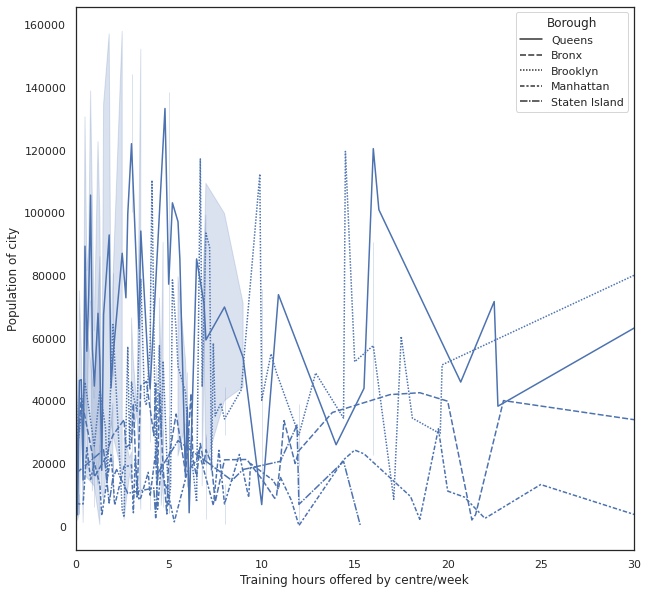

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(df['Training  Hours Per Wk'],df['Census Tract'],style=df['Borough'])
plt.xlim(0,30)
plt.xlabel("Training hours offered by centre/week")
plt.ylabel("Population of city")

We can find the average training hours/borough by

In [ ]:
df.loc[:,['Borough','Training  Hours Per Wk']].groupby('Borough').mean()

,Training Hours Per Wk
Borough,
Bronx,5.321053
Brooklyn,5.298601
Manhattan,5.949573
Queens,3.719531
Staten Island,5.644000


Result depicts that average training hours are less than 6 in all boroughs. 

## Languages offered at Centres

In [ ]:
Lang= df['Language Access'].str.split(',', expand=True)
Lang.nunique()

0     17
1     47
2     29
3     25
4     21
5     19
6     11
7      7
8      8
9      6
10     3
11     2
12     1
13     1
14     1
15     1
16     1
dtype: int64

In [ ]:
Lang.columns = ['Staff','Multilingual','Spanish_Chinese','Korean_mandarin','Russian','Bangali','Gujrati','Hindi','Punjabi','Urdu','lang10','lang11','lang12','lang13','lang14','lang15','lang16']

List of al languages and staff assistance is given below.

In [ ]:
Lang.value_counts()

Staff                                                                                                                                                                                                               Multilingual  Spanish_Chinese        Korean_mandarin         Russian   Bangali   Gujrati      Hindi    Punjabi  Urdu           lang10    lang11                 lang12     lang13     lang14   lang15  lang16
Branch displays signage in multiple languages.  Reservation and printing software supports both English and Spanish instructions.  Public Windows computers offer the following keyboard input languages:  English   Spanish       Chinese (Simplified)   Chinese (Traditional)   Russian   Bengali   Vietnamese   French   German   Arabic (101)   Italian   Polish (Programmers)   Japanese   Albanian   Korean   Hindi   Urdu     140
dtype: int64

Following graph shows the percentage of each entry for which courses are offered.

Text(0.5, 0, 'Languages offered')

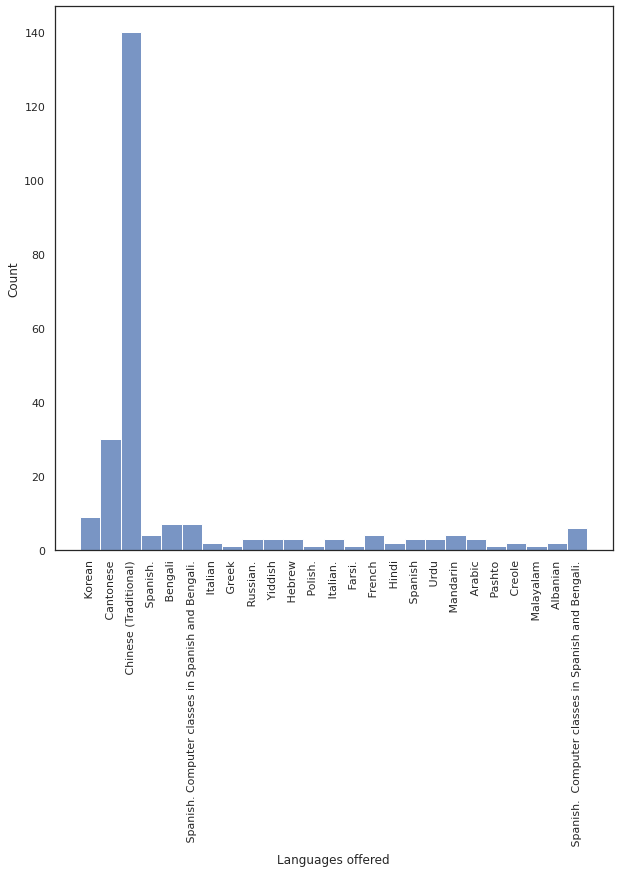

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(Lang.iloc[:,3])
plt.xticks(rotation=90)
plt.xlabel("Languages offered")

Chinese is offered the highest at the centres as assistance language.  We can verify other languages as well,

<AxesSubplot:>

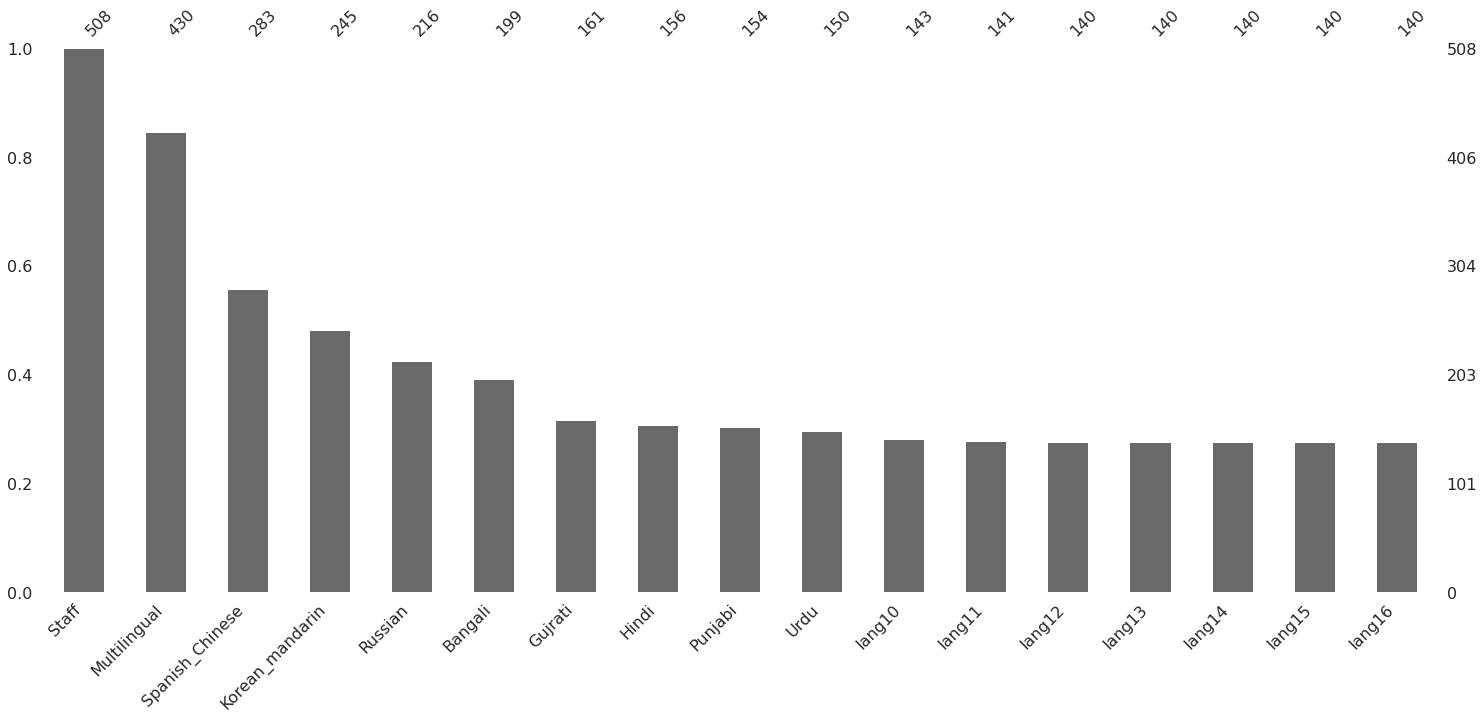

In [ ]:
msno.bar(Lang)

### Corelation between numerical variables

<AxesSubplot:>

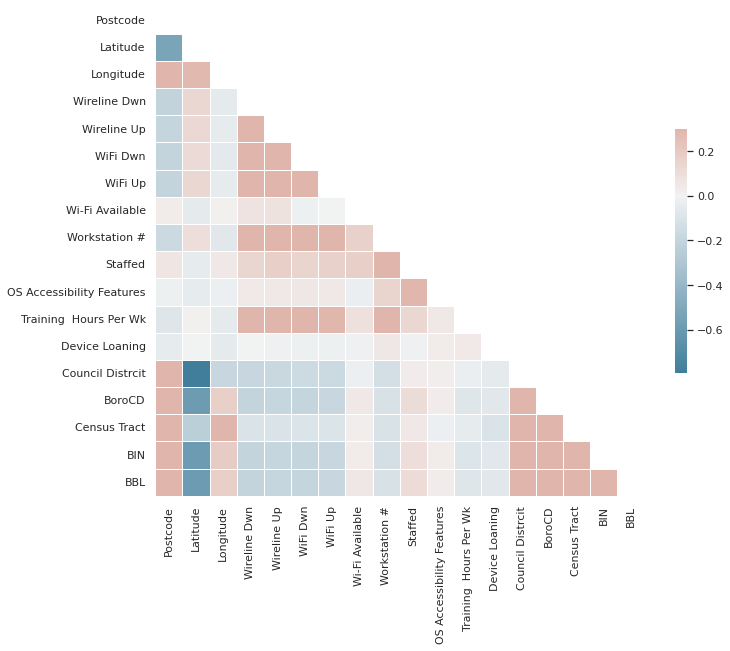

In [ ]:
sns.set_theme(style="white")

# Generate a large random dataset


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

There is very low correlation between numerical variables. So they can be all used after hot encoding in machine learning algorithms. 

### Trends from the Lab opening hours on 7 days of week

In [ ]:
x = sun_hours.value_counts()
y = sat_hours.value_counts()

In [ ]:
px.bar(x,color=fri_hours.unique())
px.bar(y)

ValueError: All arguments should have the same length. The length of argument `color` is 28, whereas the length of  previously-processed arguments ['index', '0'] is 7

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8507b333-aaeb-4ead-bf95-a72a2bcf3758' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>